## 크롤링

In [1]:
# 인스타 URL
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [5]:
# 로그인
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 크롬 드라이버를 로드
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 로그인 페이지로 이동
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

# 사용자 이름과 비밀번호를 입력
username = driver.find_element(By.NAME, 'username')
password = driver.find_element(By.NAME, 'password')
username.send_keys('chuncm@naver.com')
password.send_keys('970dnswjsqud0402!')

# 로그인 버튼을 클릭
login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
login_button.click()
time.sleep(5)

word = '강릉맛집'
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\532435476.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [6]:
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [7]:
# 패키지 불러오기
import re
from bs4 import BeautifulSoup

In [8]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ''
        
    tags = re.findall(r'#[^\s#,\<]+', content)
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    try:
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
        
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['(협찬) @woogadak 안녕하세요~ "우가닭"입니다😊 우리 식탁에서 친숙한 닭의 특수부위를 숯불에 구워먹는 숯불닭요리 전문점입니다. 쫄깃 쫀득한 식감에 숯향 한가득 머금은 닭목살 직화 불맛이 매력적인 무뼈닭발 입에 넣음과 동시에 사라져버리는 부드러운 닭갈비  친절하고 손큰 사장님과 정갈한 사이드메뉴까지 강릉에 오신 분들은 꼭 거쳐가는 신흥 맛집입니다~! 교동택지 대로변에 위치하여, 찾아오시기 너무 쉬우니 강릉여행을 계획하는 분들 오세요~:) 📍주소 : 강원도 강릉시 솔올로 63📍영업시간 : 17:00 ~ 01:00📍추천메뉴 : 닭목살/ 닭갈비/ 닭발#강릉맛집 #강릉중앙시장 #정동진여행 #오죽헌 #안목해변 #교동택지맛집 #강릉카페거리 #주문진 #경포대 #경포호 #안반데기',
 '2023-04-05',
 0,
 '',
 ['#강릉맛집',
  '#강릉중앙시장',
  '#정동진여행',
  '#오죽헌',
  '#안목해변',
  '#교동택지맛집',
  '#강릉카페거리',
  '#주문진',
  '#경포대',
  '#경포호',
  '#안반데기']]

In [9]:
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

In [67]:
# 함수를 토대로 여러 크롤링데이터 수집
word = '강릉여행'
url = insta_searching(word)

In [68]:
driver.get(url)
time.sleep(3)

In [69]:
select_first(driver)

In [70]:
results = []
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['.골목스냅(2022)4,5월 촬영문의프로필 카카오링크&Dm으로 연락주세요📩', '2023-04-05', '52', '강릉', []], ['다루 전국 찻집 알아보기 🏡다루 전국 찻집 알아보기 - 강릉 3편😀구독자님들의 추천을 받아 알게된 강릉 찻집을 추가로 알려드립니다 :)또 알고 계신 찻집이 있다면 댓글로 알려주세요~! 4편도 만들어보자구요! 😎강릉은 서울에서 자주 가는 여행지이기도하고, 먹거리와 자연경관이 정말 맛있고, 아름다운 도시죠.😊강릉에도 차모임과 티코스들이 많이 있는데요, 이러한 차 활동들을 만들어 나가는 찻집들을 소개드려요🍵찻집에서는 차를 마시는 것 이상으로 차모임, 티클래스를 참여해보면서 차에 대해 더 깊이 빠질 수 있는 시간을 가질 수 있어요.❣다루에서 보는 찻집이 도움이 되었다면 댓글을🙏다루에서 보는 찻집에 대한 정보를 수정하고 싶다면 DM을😍다루에서 소개하고 싶은 찻집이나 차문화 공간이 있다면 DM과 댓글을 남겨주세요!여러분의 지역을 소개받고 싶다면 댓글로 지역을 알려주세요 :)다루가 달려가겠습니다 🏃\u200d♂️🏃\u200d♀️👍세상의 모든 찻집을 다루다, 다루', '2023-04-05', '62', '', []]]


In [22]:
import pandas as pd

In [23]:
# 강릉맛집
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_gangneung1.xlsx', index = False)

In [56]:
# 강릉카페
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_gangneung2.xlsx', index = False)

In [61]:
# 강릉카페거리
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_gangneung3.xlsx', index = False)

In [66]:
# 강릉데이트
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_gangneung4.xlsx', index = False)

In [71]:
# 강릉여행
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_gangneung5.xlsx', index = False)

In [74]:
# 여러 키워드로 검색한 결과를 저장하여 통합 저장
gangneung_insta_df = pd.DataFrame([])
# 파일이 저장되어있는 위치
folder = './'
f_list = ['crawling_gangneung1.xlsx', 'crawling_gangneung1.xlsx', 'crawling_gangneung2.xlsx', 'crawling_gangneung3.xlsx', 'crawling_gangneung4.xlsx', 'crawling_gangneung5.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    gangneung_insta_df = gangneung_insta_df.append(temp)
    
gangneung_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

# 중복데이터 제거 후 저장
# content열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로판단하고 제거
# inplace = True 옵션을 사용해 원본 데이터 변경

gangneung_insta_df.drop_duplicates(subset = ['content'], inplace = True)

# 데이터 저장
gangneung_insta_df.to_excel('crawling_gangneung.xlsx', index = False)

C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\4047276864.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gangneung_insta_df = gangneung_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\4047276864.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gangneung_insta_df = gangneung_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\4047276864.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gangneung_insta_df = gangneung_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\4047276864.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gangneung_insta_df = gangneun

In [76]:
# 데이터 확인
gangneung_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 98
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  306 non-null    object
 1   date     307 non-null    object
 2   like     307 non-null    int64 
 3   place    110 non-null    object
 4   tags     307 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.4+ KB


## 워드 클라우드

In [77]:
# 워드 클라우드
# 크롤링 결과 중 해시태그 불러오기
import pandas as pd
raw_total = pd.read_excel('crawling_gangneung.xlsx')
raw_total['tags'][:3]

0    ['#강릉맛집강릉현지인', '#강릉맛집', '#강릉현지인맛집', '#강릉중앙시장맛집...
1    ['#강릉맛집', '#강릉중앙시장', '#정동진여행', '#오죽헌', '#안목해변'...
2    ['#강릉맛집', '#강릉횟집', '#경포대횟집', '#경포대맛집추천', '#강릉물...
Name: tags, dtype: object

In [80]:
# 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [83]:
# 저장한 태그들 확인
tags_total[:50]

['#강릉맛집강릉현지인',
 '#강릉맛집',
 '#강릉현지인맛집',
 '#강릉중앙시장맛집',
 '#정동진맛집',
 '#강릉맛집추천',
 '#한우타다끼',
 '#꼬막비빔밥',
 '#세인트존스호텔',
 '#씨마크호텔',
 '#강릉로컬맛집',
 '#강릉맛집',
 '#강릉중앙시장',
 '#정동진여행',
 '#오죽헌',
 '#안목해변',
 '#교동택지맛집',
 '#강릉카페거리',
 '#주문진',
 '#경포대',
 '#경포호',
 '#안반데기',
 '#강릉맛집',
 '#강릉횟집',
 '#경포대횟집',
 '#경포대맛집추천',
 '#강릉물회',
 '#강릉여행',
 '#강릉가볼만한곳',
 '#강릉핫플',
 '#강릉강문해변맛집',
 '#강릉현지인추천',
 '#강릉세인트존스호텔맛집',
 '#강릉홍게',
 '#강릉대게',
 '#강릉맛집경포대',
 '#강릉맛집',
 '#경포대맛집',
 '#경포대횟집',
 '#강릉데이트코스',
 '#강릉횟집',
 '#강릉여행',
 '#강릉맛집추천',
 '#강원도맛집',
 '#강릉가성비맛집',
 '#강릉현지인맛집',
 '#강릉맛집추천',
 '#강릉중앙시장맛집',
 '#강릉김군박군횟집',
 '#김군박군횟집']

In [84]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('#강릉여행', 108),
 ('#강릉맛집', 94),
 ('', 94),
 ('#강릉카페', 58),
 ('#강릉가볼만한곳', 57),
 ('#강릉데이트', 46),
 ('#강릉핫플', 36),
 ('#강릉', 36),
 ('#강릉여행코스', 32),
 ('#강릉맛집추천', 25),
 ('#강릉데이트코스', 24),
 ('#강릉핫플레이스', 24),
 ('#강릉현지인맛집', 21),
 ('#강릉역맛집', 20),
 ('#강원도여행', 19),
 ('#강릉카페거리', 15),
 ('#경포대맛집', 15),
 ('#강릉숙소', 15),
 ('#강릉맛집투어', 14),
 ('#강릉교동맛집', 13),
 ('#강릉여행중', 12),
 ('#강릉펜션', 12),
 ('#강릉중앙시장', 10),
 ('#강릉맛집베스트', 10),
 ('#강릉카페추천', 10),
 ('#강릉횟집', 9),
 ('#강릉오션뷰펜션', 9),
 ('#강릉중앙시장맛집', 8),
 ('#강릉물회', 8),
 ('#강릉현지인추천', 8),
 ('#강릉고기맛집', 8),
 ('#주문진여행', 8),
 ('#강릉시내맛집', 8),
 ('#맞팔', 7),
 ('#강릉펜션추천', 7),
 ('#좋아요', 7),
 ('#강릉카페투어', 7),
 ('#정동진맛집', 6),
 ('#강원도맛집', 6),
 ('#강릉갈비맛집', 6),
 ('#강릉맛집삼십미리', 6),
 ('#강릉데이트코', 6),
 ('#강릉술집', 6),
 ('#강릉삼겹살', 6),
 ('#강릉역맛집금송아지', 6),
 ('#강릉스파펜션', 6),
 ('#안목해변맛집', 6),
 ('#강릉맘', 6),
 ('#일상', 6),
 ('#강릉교동카페', 6),
 ('#양양펜션', 6),
 ('#주문진펜션', 6),
 ('#강릉로컬맛집', 5),
 ('#경포대횟집', 5),
 ('#삼십미리..', 5),
 ('#주문진맛집', 5),
 ('#강릉여행지추천', 5),
 ('#오빠랑여행갈래', 5),
 ('#강릉맛집해평순대국', 5),
 ('#선팔', 

In [90]:
# 데이터 정제
# 필요없는 해시태그 정의하여 제외시켜준다
STOPWORDS = ['', '#해평순대국', '#금송아지예약문의', '#일상', '#선팔', '#강릉맘', '#린펜션', '#강릉펜션', '#강원도펜션', \
           '#강릉스파펜션', '#좋아요반사', '#맞팔', '#강릉애견동반', '#양양펜션', '#동해펜션', '#삼십미리..', '#좋아요']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('#강릉여행', 108),
 ('#강릉맛집', 94),
 ('#강릉카페', 58),
 ('#강릉가볼만한곳', 57),
 ('#강릉데이트', 46),
 ('#강릉핫플', 36),
 ('#강릉', 36),
 ('#강릉여행코스', 32),
 ('#강릉맛집추천', 25),
 ('#강릉데이트코스', 24),
 ('#강릉핫플레이스', 24),
 ('#강릉현지인맛집', 21),
 ('#강릉역맛집', 20),
 ('#강원도여행', 19),
 ('#강릉카페거리', 15),
 ('#경포대맛집', 15),
 ('#강릉숙소', 15),
 ('#강릉맛집투어', 14),
 ('#강릉교동맛집', 13),
 ('#강릉여행중', 12),
 ('#강릉중앙시장', 10),
 ('#강릉맛집베스트', 10),
 ('#강릉카페추천', 10),
 ('#강릉횟집', 9),
 ('#강릉오션뷰펜션', 9),
 ('#강릉중앙시장맛집', 8),
 ('#강릉물회', 8),
 ('#강릉현지인추천', 8),
 ('#강릉고기맛집', 8),
 ('#주문진여행', 8),
 ('#강릉시내맛집', 8),
 ('#강릉펜션추천', 7),
 ('#강릉카페투어', 7),
 ('#정동진맛집', 6),
 ('#강원도맛집', 6),
 ('#강릉갈비맛집', 6),
 ('#강릉맛집삼십미리', 6),
 ('#강릉데이트코', 6),
 ('#강릉술집', 6),
 ('#강릉삼겹살', 6),
 ('#강릉역맛집금송아지', 6),
 ('#안목해변맛집', 6),
 ('#강릉교동카페', 6),
 ('#양양펜션', 6),
 ('#주문진펜션', 6),
 ('#강릉로컬맛집', 5),
 ('#경포대횟집', 5),
 ('#주문진맛집', 5),
 ('#강릉여행지추천', 5),
 ('#오빠랑여행갈래', 5),
 ('#강릉맛집해평순대국', 5),
 ('#초당동카페', 5),
 ('#초당커피', 5),
 ('#강릉초당카페', 5),
 ('#카페', 5),
 ('#강릉여행', 5),
 ('#버스스탑343', 5),
 ('#강릉맛집버스스탑343', 5),
 

In [91]:
# 시각화에 필요한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# 빈도수 기준 상위 30개의 데이터를 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

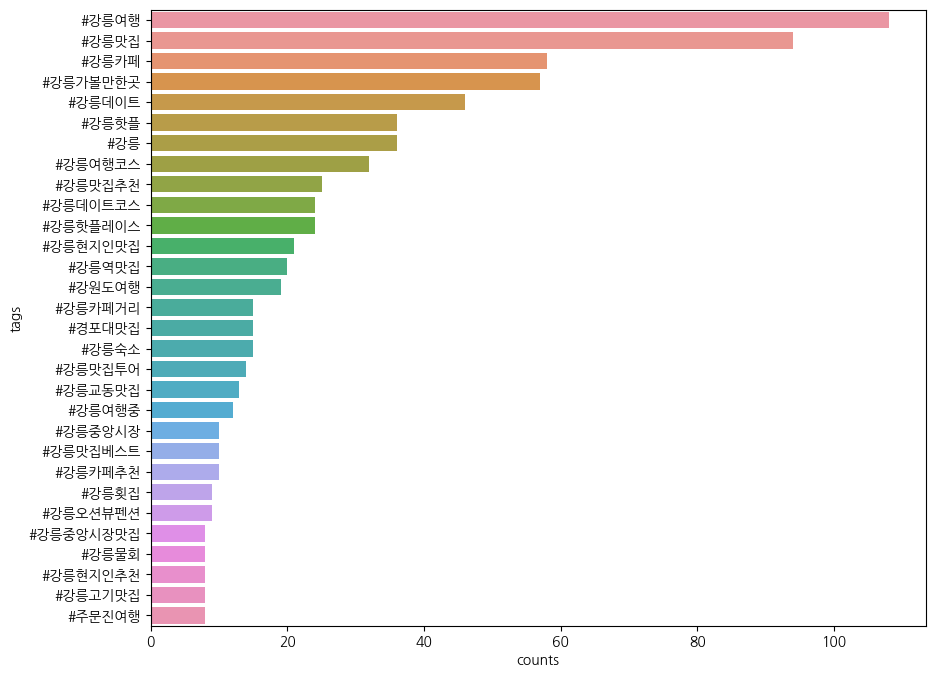

In [93]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))

sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [94]:
# 워드 클라우드를 위한 패키지 불러오기
from wordcloud import WordCloud
import platform

In [95]:
# 워드 클라우드에 필요한 글꼴 지정
# 윈도우의 경우
if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
# Mac 의 경우
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

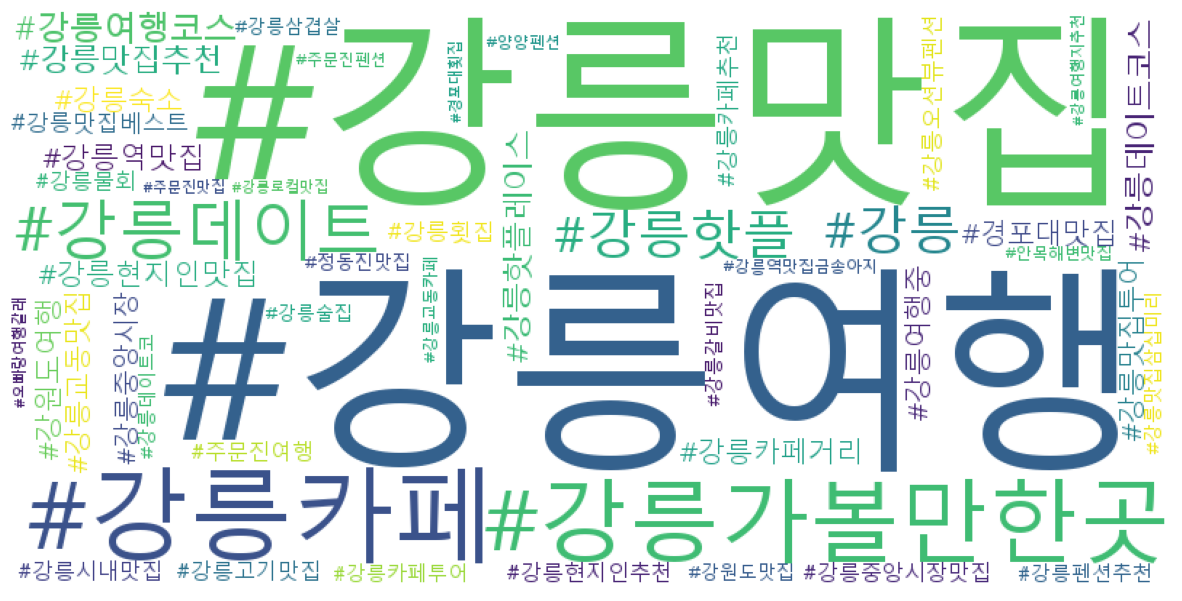

In [99]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
# 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('./tag-wordcloud1.png')

## 지도 시각화

In [97]:
# 지도 시각화
# 크롤링 된 데이터에서 위치 정보가 저장되어 있는 place를 선택한 뒤
# value_counts() 함수를 통해 빈도수 집계
location_counts = raw_total['place'].value_counts()
location_counts

강원도 강릉                     17
강릉                         15
린펜션                         4
세인트존스호텔                     3
강릉 저녁놀                      3
                           ..
초당커피정미소                     1
경포해변                        1
강릉항요트마리나                    1
새바람이오는그늘                    1
Gangwon-do, South Korea     1
Name: place, Length: 65, dtype: int64

In [98]:
# pandas 데이터프레임의 형태로 저장
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
강원도 강릉,17
강릉,15
린펜션,4
세인트존스호텔,3
강릉 저녁놀,3


In [100]:
location_counts_df.to_excel('./location_counts1.xlsx')

In [101]:
# 위치 정보만 선택 후 list형태로 변환한 뒤 저장
locations = list(location_counts.index)
locations

['강원도 강릉',
 '강릉',
 '린펜션',
 '세인트존스호텔',
 '강릉 저녁놀',
 '강원도 강릉 경포해변',
 'Interview (인터뷰)',
 'Gangneung, Korea',
 '강릉시 교동택지',
 '경포호수',
 '강릉 안목해변',
 '7drivein',
 '허균.허난설헌 기념공원',
 '커피멜로우',
 '벌집손칼국수',
 '포토이즘 강릉점',
 '주문진해변',
 '라이스앤샤인',
 '디어문 아트&네온',
 '강릉중앙시장',
 '강릉시',
 '카페살림',
 '아날로그소사이어티',
 'bluekitchen112',
 '강릉솔향수목원',
 '경포호',
 '경포대',
 '강원도',
 '강릉 경포대',
 '강릉시 경포호',
 '강릉오죽한옥마을',
 '순두부젤라또',
 'Lifestyle Farm, Le Cottage',
 '강문해변',
 '강릉 중앙시장',
 '서울',
 '강릉 옥천동',
 'End to and - 엔드투앤드',
 'bridgeofdaraja',
 '강릉시성산면',
 '비비플로',
 '유천택지',
 '커피벌스데이',
 '강릉중앙시장 먹자골목',
 '강원도 강릉 동해막국수집',
 '강원도 강릉시',
 '강원도 동해',
 '강릉 안목해변 커피거리',
 '카페곳',
 '성수동',
 '강릉역',
 '르봉마젤',
 '강릉시 성산면',
 '카페명경',
 '강릉남산공원',
 '정동심곡 바다부채길',
 '순포해변',
 'Jukdo Surf Beach 죽도 서프 해변',
 '로지커피',
 'The Thistle Gangneung',
 '초당커피정미소',
 '경포해변',
 '강릉항요트마리나',
 '새바람이오는그늘',
 'Gangwon-do, South Korea']

In [102]:
# 카카오 키워드 검색 API로 위치 정보 가져오기
# 패키지 불러오기
import requests

In [103]:
# 카카오 키워드 검색 API로 위치 정보 검색 함수
def find_places(searching):
    # 접속 URL
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
    }
    # API 요청 & 정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # 필요한 정보 입력
    # 최대 5개 정보가 저장되어 넘어오고, 그 중 첫번째 결과를 활용
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    # 장소명, x좌표, y좌표, 검색어를 리스트형태로 저장
    data = [name, x, y, searching]
    
    return data

In [104]:
# 진행사항 모니터링 가능한 패키지
from tqdm import tqdm_notebook
import time

In [105]:
# 인스타그램 데이터의 위치정보 검색
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
    
locations_inform

C:\Users\chunc\AppData\Local\Temp\ipykernel_13676\674430011.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/65 [00:00<?, ?it/s]

[['경포해수욕장', '128.910210247605', '37.8034055083125', '강원도 강릉'],
 ['경포해수욕장', '128.910210247605', '37.8034055083125', '강릉'],
 ['린펜션', '128.87324389223858', '37.84170111141366', '린펜션'],
 ['세인트존스호텔', '128.92097417796126', '37.79125474022498', '세인트존스호텔'],
 ['저녁놀', '128.878839576799', '37.7659883893645', '강릉 저녁놀'],
 ['경포해수욕장', '128.910210247605', '37.8034055083125', '강원도 강릉 경포해변'],
 ['스테이인터뷰', '129.012276065903', '37.7078899949334', 'Interview (인터뷰)'],
 ['한국폴리텍대학 강릉캠퍼스',
  '128.88991497402236',
  '37.73771571727019',
  'Gangneung, Korea'],
 ['교동택지', '128.878504281108', '37.7618858898563', '강릉시 교동택지'],
 ['강릉원주대학교 강릉캠퍼스 해람지', '128.869915314616', '37.7690383058978', '경포호수'],
 ['안목해변', '128.948275405137', '37.7722617595376', '강릉 안목해변'],
 ['허균허난설헌기념공원', '128.90949773031988', '37.79143235584392', '허균.허난설헌 기념공원'],
 ['커피멜로우', '127.1022272219913', '36.810068326036856', '커피멜로우'],
 ['벌집', '128.892835299429', '37.7544785939973', '벌집손칼국수'],
 ['포토이즘스튜디오 강릉점', '128.915156132541', '37.7945384451747', '포토이즘 강

In [109]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./locations1.xlsx', index = False)

In [110]:
# 게시량
location_counts_df = pd.read_excel('./location_counts1.xlsx', index_col = 0)
# 위치 정보
location_inform_df = pd.read_excel('./locations1.xlsx')

In [111]:
location_data = pd.merge(locations_inform_df, location_counts_df, how = 'inner', left_on = 'name_official', right_index = True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
2,린펜션,128.87324389223858,37.84170111141366,린펜션,4
3,세인트존스호텔,128.92097417796126,37.79125474022498,세인트존스호텔,3
12,커피멜로우,127.1022272219913,36.810068326036856,커피멜로우,1
15,주문진해변,128.818780222834,37.9111195197386,주문진해변,1
16,라이스앤샤인,128.883526299922,37.7523027041265,라이스앤샤인,1


In [112]:
# 동일한 name_official을 가지는 데이터의 인스타그램 게시 횟수 합치기
location_data = location_data.pivot_table(index = ['name_official', '경도', '위도'], values = 'place', aggfunc = 'sum')
location_data.head()

,,,place
name_official,경도,위도,
강릉솔향수목원,128.861466745895,37.6978031751826,1
강릉역,128.899627553491,37.7645235587621,1
강릉오죽한옥마을,128.87849718174908,37.777211140306534,1
강릉중앙시장,128.8986237900098,37.754025117657804,2
강릉항요트마리나,128.951070029046,37.7723704481665,1


In [113]:
# 병합한 데이터 저장
location_data = location_data.reset_index()
location_data.to_excel('location_inform1.xlsx')

In [114]:
# 지도 표시
import folium

In [115]:
city_gangneung = [37.75324012, 128.8753382]
map_gangneung = folium.Map(location = city_gangneung, zoom_start = 11)

In [116]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count) * 2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    # 원을 생성(위치, 크기, 색상, 원 이름)
    folium.CircleMarker((long, lat), radius = size, color = 'red', popup = name).add_to(map_gangneung)
map_gangneung

In [117]:
# 지도 저장
map_gangneung.save('gangneung.html')

In [118]:
# cluster를 이용하여 지도 표시
from folium.plugins import MarkerCluster

In [119]:
locations = []
names = []
for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
    
icon_create_function = """\
function(cluster){
    return L.divIcon({
    html: '<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconsize: new L.point(30, 30)
    });
}"""

In [124]:
city_gangneung = [37.75324012, 128.8753382]
map_gangneung2 = folium.Map(location = city_gangneung, zoom_start = 11)

In [125]:
marker_cluster = MarkerCluster(
    locations = locations, popups = names,
    name = 'gangneung',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [126]:
marker_cluster.add_to(map_gangneung2)
folium.LayerControl().add_to(map_gangneung2)
map_gangneung2

In [127]:
# 지도 저장
map_gangneung2.save('gangneung_cluster.html')